In [1]:
# To be able to make edits to repo without having to restart notebook
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import tkinter as tk
from scipy import signal
from scipy import ndimage
from math import ceil
import cv2
import ot as pot
import itertools
import matplotlib.patches as patches

In [3]:

PROJECT_PATH = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))
# PROJECT_PATH = os.getcwd()
sys.path.append(os.path.dirname(PROJECT_PATH))

unit_matcher_path = os.getcwd()
prototype_path = os.path.abspath(os.path.join(unit_matcher_path, os.pardir))
project_path = os.path.abspath(os.path.join(prototype_path, os.pardir))
lab_path = os.path.abspath(os.path.join(project_path, os.pardir))
sys.path.append(project_path)
os.chdir(project_path)
print(project_path)

c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\_prototypes


In [4]:
csv_path2 = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\remapping_outputs\remapping_output2\obj_remapping.xlsx"
csv_path1 = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\remapping_outputs\remapping_output\obj_remapping.xlsx"

df1 = pd.read_excel(csv_path1)
df2 = pd.read_excel(csv_path2)

df = pd.concat([df1, df2], axis=0)
df = df2

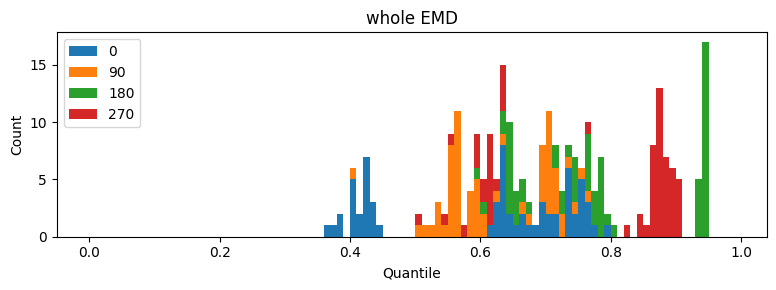

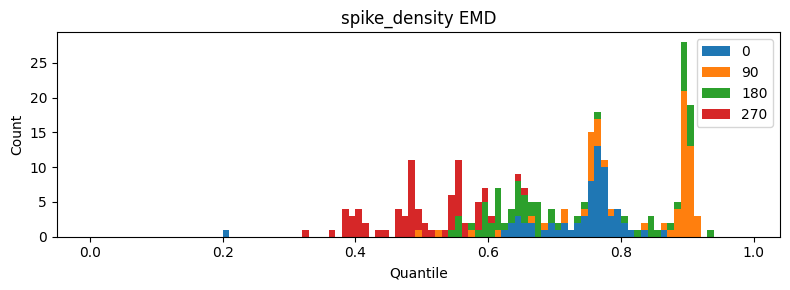

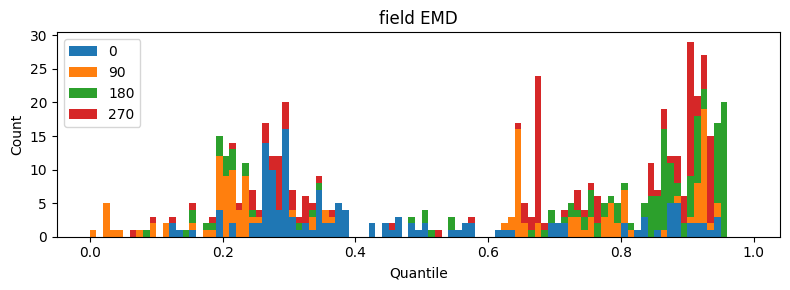

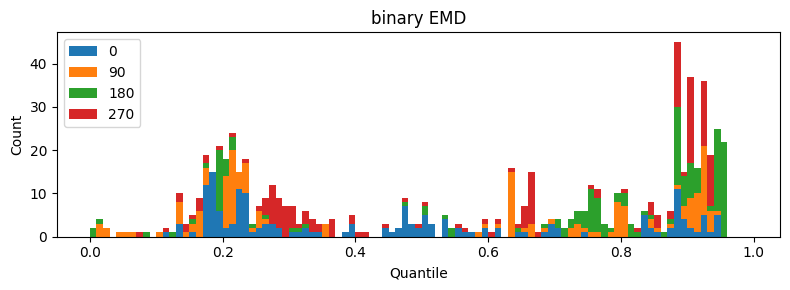

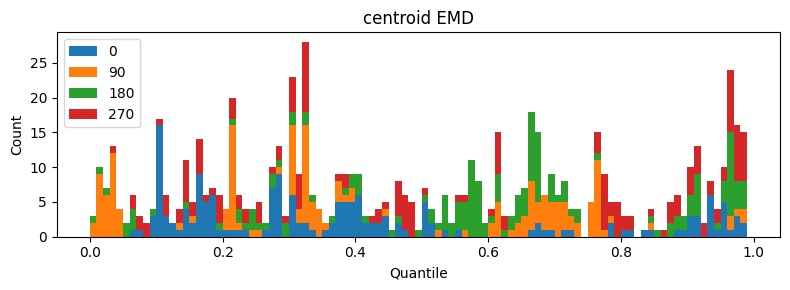

In [7]:
scores = ['whole', 'spike_density', 'field', 'binary', 'centroid']

for score in scores:

    # Whole map score, all quantiles
    sample = df.loc[df['score'] == score].dropna()
    q_0 = sample['obj_q_0'].values
    q_90 = sample['obj_q_90'].values
    q_180 = sample['obj_q_180'].values
    q_270 = sample['obj_q_270'].values
    agg = np.hstack([q_0,q_90, q_180, q_270])

    fig = plt.figure(figsize=(8,3))
    # ct, bins = np.histogram(agg, bins=100)
    # plt.bar(bins[:-1], ct, width=0.01, label='All Quantiles')
    plt.hist([q_0,q_90, q_180, q_270],np.arange(0,1,0.01), stacked=True, density=False, label=['0', '90', '180', '270'])
    # plt.axvline(np.mean(agg) - 1.96 * np.std(agg), color='k')
    plt.title(score + ' EMD')
    plt.xlabel('Quantile')
    plt.ylabel('Count')
    plt.legend()
    fig.tight_layout()
    plt.show()



    # look at literatture, distance/cutoff of centroid to object that is reasonable, (look moser paper)
    # do separate for EMD and centroid, classify as object or not and see how plots look in terms of quantiles

In [ ]:
scores = ['whole', 'spike_density', 'field', 'binary', 'centroid']

for score in scores:

    # Whole map score, all quantiles
    sample = df.loc[df['score'] == score].dropna()
    q_0 = sample['obj_q_0'].values
    q_90 = sample['obj_q_90'].values
    q_180 = sample['obj_q_180'].values
    q_270 = sample['obj_q_270'].values
    agg = np.hstack([q_0,q_90, q_180, q_270])

    fig = plt.figure(figsize=(8,3))
    # ct, bins = np.histogram(agg, bins=100)
    # plt.bar(bins[:-1], ct, width=0.01, label='All Quantiles')
    plt.hist([q_0,q_90, q_180, q_270],np.arange(0.01,1,0.01), stacked=True, density=False, label=['0', '90', '180', '270'])
    # plt.axvline(np.mean(agg) - 1.96 * np.std(agg), color='k')
    plt.title(score + ' EMD')
    plt.xlabel('Quantile')
    plt.ylabel('Count')
    plt.legend()
    fig.tight_layout()
    plt.show()